In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")
# sns.set_style("darkgrid")

In [2]:
# Specify image file path
img_file_path: str = "../../datasets/foto-1.jpg"
img = plt.imread(img_file_path)

print(f"Pixel size: {img.shape}")

Pixel size: (225, 225, 3)


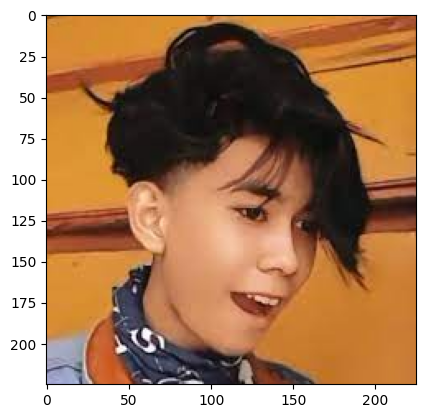

In [3]:
# Let's take a look at the picture
plt.imshow(img);

### Convert this image into tabular data

In [4]:
img_data: np.ndarray = img.reshape(-1, 3)
img_data

array([[243, 178, 114],
       [234, 169, 105],
       [223, 158,  92],
       ...,
       [200, 123,  53],
       [200, 123,  51],
       [201, 124,  52]], dtype=uint8)

In [5]:
def elbow_method(
    X: pd.DataFrame,
    min_cluster_range: int,
    max_cluster_range: int
) -> None:
    """
    Specify right number of cluster by doing elbow method

    Parameters
    ----------
        X: pd.DataFrame
            specified data

        min_cluster_range: int
            minimum number of probable range of clusters

        max_cluster_range: int
            maximum number of probable range of clusters
    """
    # Within cluster sum of squares
    wcss = []
    for cluster in range(min_cluster_range, max_cluster_range+1):
        kmeans = KMeans(n_clusters=cluster)
        kmeans.fit(X)

        wcss.append(kmeans.inertia_)

    # Plot graph of elbow method
    plt.plot(range(min_cluster_range, max_cluster_range+1), wcss)
    plt.title("Elbow method")
    plt.xlabel("Number of clusters")
    plt.ylabel('WCSS')
    plt.show()

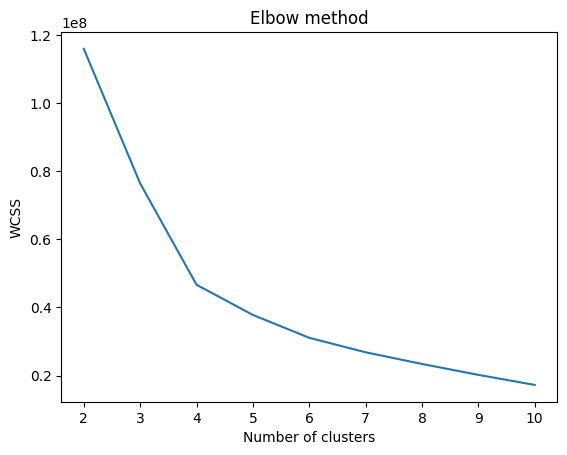

In [6]:
elbow_method(
    X=img_data,
    min_cluster_range=2,
    max_cluster_range=10
)

In [7]:
# Make an instance of KMeans to find representation of some pixels
kmeans: KMeans = KMeans(n_clusters=4)
clusters: np.ndarray = kmeans.fit_predict(img_data) 

In [8]:
# Make color-like pallete by leveraging cluster centers
palette = kmeans.cluster_centers_.astype(int)
palette

array([[208, 133,  58],
       [ 36,  26,  23],
       [215, 160, 128],
       [141,  79,  50]])

In [9]:
# Replace existed pixel with each sample's cluster centers
quantized_img = palette[clusters].reshape(*img.shape)
quantized_img

array([[[215, 160, 128],
        [215, 160, 128],
        [215, 160, 128],
        ...,
        [141,  79,  50],
        [141,  79,  50],
        [141,  79,  50]],

       [[208, 133,  58],
        [141,  79,  50],
        [141,  79,  50],
        ...,
        [141,  79,  50],
        [141,  79,  50],
        [141,  79,  50]],

       [[141,  79,  50],
        [141,  79,  50],
        [141,  79,  50],
        ...,
        [141,  79,  50],
        [141,  79,  50],
        [141,  79,  50]],

       ...,

       [[215, 160, 128],
        [215, 160, 128],
        [215, 160, 128],
        ...,
        [208, 133,  58],
        [208, 133,  58],
        [208, 133,  58]],

       [[215, 160, 128],
        [215, 160, 128],
        [215, 160, 128],
        ...,
        [208, 133,  58],
        [208, 133,  58],
        [208, 133,  58]],

       [[215, 160, 128],
        [215, 160, 128],
        [215, 160, 128],
        ...,
        [208, 133,  58],
        [208, 133,  58],
        [208, 133,  58]]

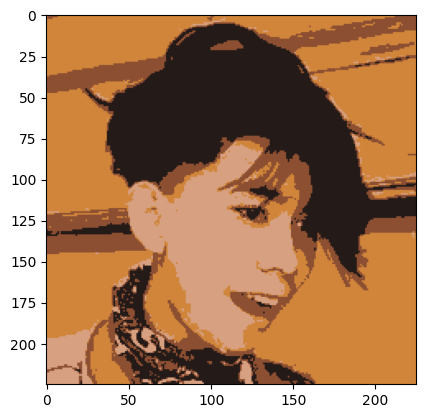

In [10]:
# Take a look at quantized image
plt.imshow(quantized_img);

In [11]:
def quantize(
    img: np.ndarray, 
    n_palette: int
) -> None:
    """
    Comparing original vs. quantized image side by side

    Parameters
    ----------
        img: np.ndarray
            array of image pixels

        n_palette: int
            specified number of different color palette
    """
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))
    
    kmeans = KMeans(n_clusters=n_palette,)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallete = kmeans.cluster_centers_.astype(int)
    quantized_img = pallete[labels].reshape(*img.shape)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

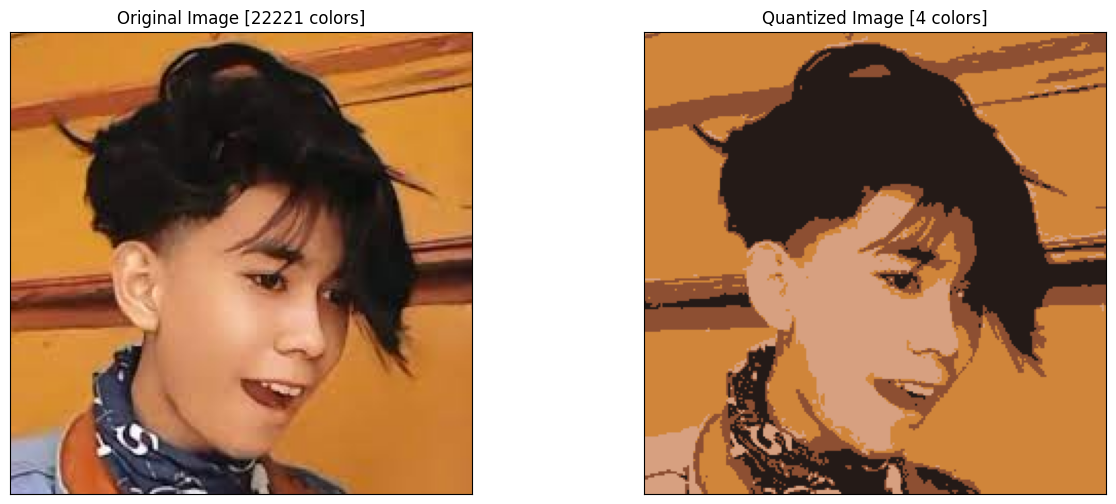

In [12]:
# Let's compare them side by side
quantize(
    img, 
    n_palette=4
)

Is it useful? **Absolutely**

In [13]:
img.shape

(225, 225, 3)

### Advantages

Original Image ==> (225 x 225 x 3 RGB)
- `(225 * 225) * (3 * 8bit) = 1.215.000 bit = 151 KB`

Quantized Image (4 palette) ==> (225 x 225) label + (4 x 3 RGB)
- `(225 * 225 * 4bit) + (4 * 3 * 8bit) = 202.596 bit = 25 KB`